In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Eigenvectors and eigenvalues

We think of matrices as linear transformations. Some matrices will rotate our space, others will rescale it. When we apply (calculate a dot product) a matrix to a vector, we end up with a transformed version of the vector.

We define a matrix
$A = \begin{pmatrix} 1 & 5 \\ 3 & 3 \end{pmatrix}$. Now using this matrix we transform all the vector of length one, what we can display as rescaling of unit circle (blue) to an ellipse (orange).

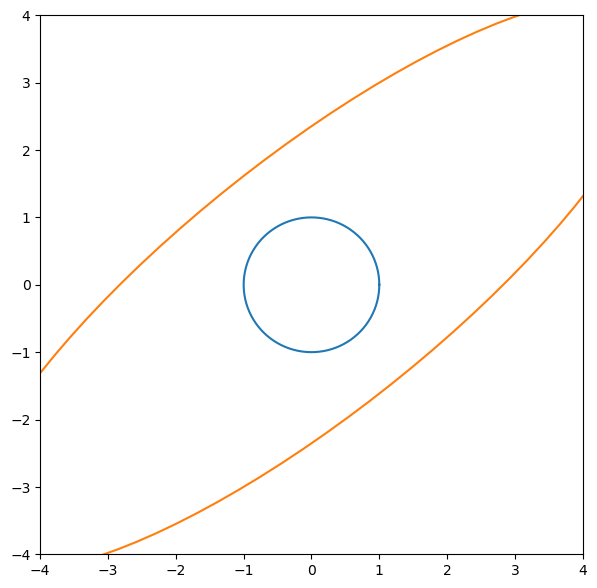

In [ ]:
#@title Plotting code { display-mode: "form" }
A = np.array([[5, 1], [3, 3]])
# import matplotlib.pyplot as plt
n_steps = 100

t = np.linspace(0, 2*np.pi, n_steps)
x = np.cos(t)
y = np.sin(t)
newX = np.zeros(len(x))
newY = np.zeros(len(x))
for i in range(len(x)):
  unitVector_i = np.array([x[i], y[i]])
  # Apply the matrix to the vector
  newXY = A.dot(unitVector_i)
  newX[i] = newXY[0]
  newY[i] = newXY[1]

plt.figure(figsize=[7,7])
plt.plot(x, y)
plt.plot(newX, newY)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Generally, there exist at least two directions where the vectors after transformation will not change the direction but only the magnitude. The vectors that point in these directions are called eigenvectors.

In [ ]:
#@title Function for plotting vectors { display-mode: "form" }
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    # plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

Below we display the vector $v = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$.

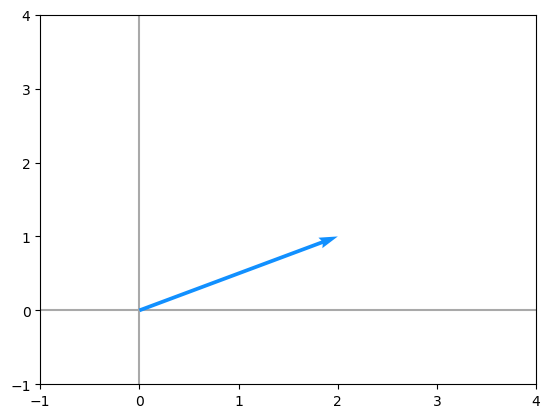

In [ ]:
v=np.array([[2],[1]])
plotVectors([v.flatten()], cols=['#1190FF'])
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

If we calculate $w = Av$, we can see how the matrix transformed $v$ (light blue) to $w$ (orange).

Vector w:
 [[11]
 [ 9]]


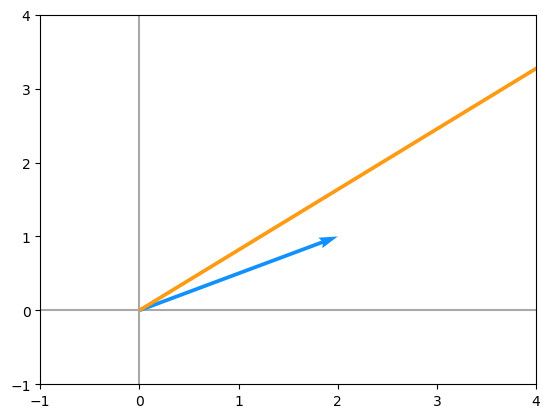

In [ ]:
Av = A.dot(v)
print(f"Vector w:\n {Av}")
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

We can try another vector, for example $v = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.

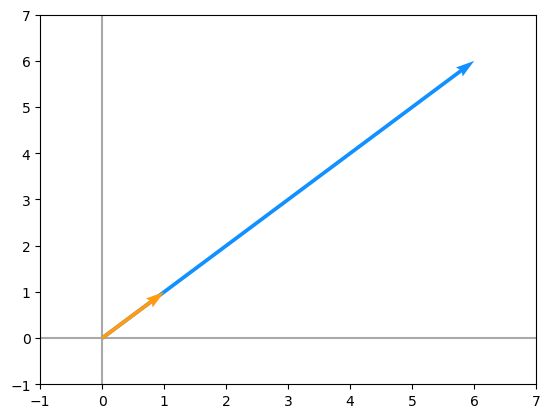

In [ ]:
v = np.array([[1], [1]])
Av = A.dot(v)
plotVectors([Av.flatten(),v.flatten()], cols=['#1190FF', '#FF9A13'])
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

We can notice that the transformation did not change the direction of this vector!
If a matrix does not change the direction of a vector, but only rescales it, the vector is an eigenvector of the matrix.
The relationship for finding eigenvectors can be written by the following equation:

 $Av = \lambda v,$

where $\lambda$ is an eigenvalue (scalar) of the matrix.

We know that one eigenvector of $A$ is:
$v = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$

We can check that $Av = \lambda v$:

$\begin{pmatrix} 5 & 1\\ 3 & 3 \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 6 \\ 6 \end{pmatrix}.$

We can see that:

$6 \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 6 \\ 6 \end{pmatrix}$

which means that $v$ is an eigenvector of $A$. Also, the corresponding eigenvalue is $\lambda=6$.

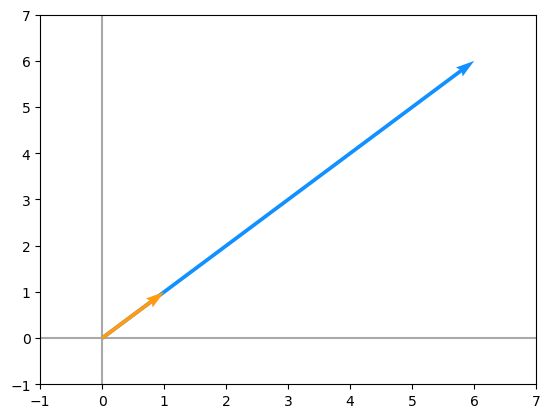

Av is actualy 6*v


In [ ]:
A = np.array([[5, 1], [3, 3]])
v = np.array([[1], [1]])

Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)
plt.show()

print("Av is actualy 6*v")

Try to find the, which of the following vectors is the second eigenvector of the matrix:
- $\begin{pmatrix} 1 \\ -2 \end{pmatrix}$ , $\begin{pmatrix} 1 \\ -3 \end{pmatrix}$, $\begin{pmatrix} 2 \\ -4 \end{pmatrix}$, $\begin{pmatrix} -2 \\ 4 \end{pmatrix}$, $\begin{pmatrix} 1 \\ -5 \end{pmatrix}$

Also, find the corresponding eigenvalue. The `Av2` corresponds to product of $A$ and the second eigenvector.

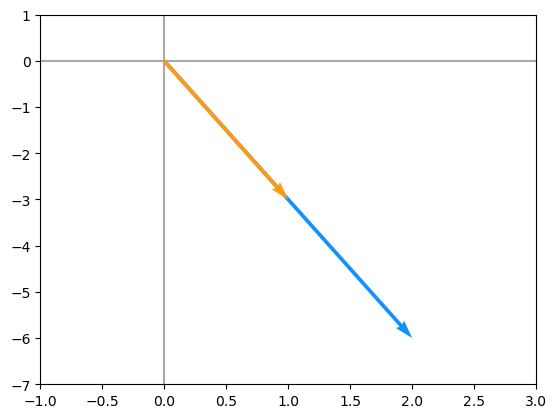

The eigenvector is: [[ 1]
 [-3]] and the corresponding eigenvalue is: 2


In [ ]:
v2 = np.array([[1], [-3]])
Av2 = A.dot(v2)
plotVectors([Av2.flatten(), v2.flatten()], cols=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)
plt.show()
print(f"The eigenvector is: {v2} and the corresponding eigenvalue is: {2}")

Now, we find the eigenvectors using `numpy`.

In [ ]:
eigval, eigvect = np.linalg.eig(A)
print(f"Eigenvalues computed by numpy: {eigval}, \n eigenvectors: \n{eigvect}")

Eigenvalues computed by numpy: [6. 2.], 
 eigenvectors: 
[[ 0.70710678 -0.31622777]
 [ 0.70710678  0.9486833 ]]


As you may notice, the eigenvectors are a little bit different from the eigenvectors we found. try to calculate a norm of the vectors (columns of the returned matrix) and maybe you will notice why the vectors are different.

In [ ]:
np.apply_along_axis(np.linalg.norm, 0, eigvect)

array([1., 1.])

The eigenvector corresponding $\lambda = 2$ is $(-0.31622777, 0.9486833)^T $.



(-7.0, 2.0)

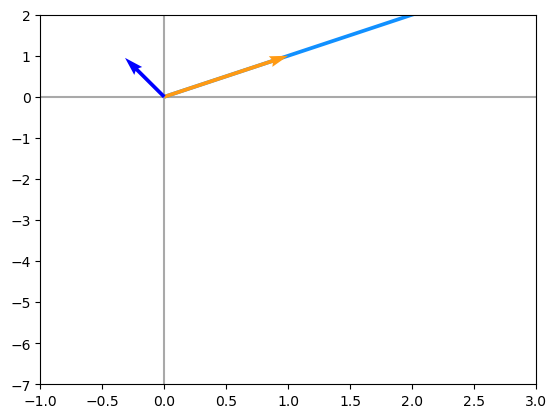

In [ ]:
v_np = eigvect[:,1]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.xlim(-1, 3)
plt.ylim(-7, 2)

The eigenvector corresponding to $\lambda = 6$ can be rescaled to $(1,1)$.

## Eigendecomposition
The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues.

The decomposition can be written as:  $A= V \Lambda V^{-1}$, where $\Lambda$ is a diagonal matrix containing all the eigenvalues and $V^{-1}$ is the inverse of V.

Let us verify that the eigenvectors and eigenvalues we found together with the inverse compose the original matrix.

In [ ]:
V = np.array([[1,1], [1,-3]])
lamb = np.diag([6, 2])

print(f"Original matrix:\n{A}")
print(f"Composed matrix:\n{V @ lamb @ np.linalg.inv(V)}")

Original matrix:
[[5 1]
 [3 3]]
Composed matrix:
[[5. 1.]
 [3. 3.]]



### Eigendecomposition of symmetric matrices
For symmetric matrices, the eigendecomposition can be expressed as
$A = Q  \Lambda Q^T$, where $\Lambda$ is the diagonal matrix containing all the eigenvalues. Note, that this does not require the inverse matrix, as $Q$ is an ortogonal matrix. This eigendecomposition of symmetric matrices is applied to perform Principal Component Analysis.

In [ ]:
A = np.array([[6, 2, 1, 4], [2, 3, 2, 1], [1, 3, 2, 5], [4, 2 ,5, 1]])
print(f"Original matrix:\n{A}")
eigVals, eigVecs = np.linalg.eig(A)
eigVals = np.diag(eigVals)
A_svd = eigVecs.dot(eigVals).dot(eigVecs.T)
print(f"Composed matrix:\n{A_svd}")

Original matrix:
[[6 2 1 4]
 [2 3 2 1]
 [1 3 2 5]
 [4 2 5 1]]
Composed matrix:
[[5.92378193 2.29646015 0.90805606 3.83641365]
 [2.29646015 2.07012524 1.83596167 1.15862426]
 [0.90805606 1.83596167 2.5572072  5.53346897]
 [3.83641365 1.15862426 5.53346897 1.44888563]]


### Visualisations of eigenvectors
Below, we have a function that creates a visualisation of how a matrix transforms a unit circle.

In [ ]:
#@title Code for visualisation of transformation made by a matrix, together with eigenvectors { display-mode: "form" }
def linearTransformation(transformMatrix):
    orange = '#FF9A13'
    blue = '#1190FF'
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)
    # Calculate eigenvectors and eigenvalues
    eigVecs = np.linalg.eig(transformMatrix)[1]
    eigVals = np.diag(np.linalg.eig(transformMatrix)[0])

    # Create vectors of 0 to store new transformed values
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        # Apply the matrix to the vector
        newXY = transformMatrix.dot(unitVector_i)
        newX[i] = newXY[0]
        newY[i] = newXY[1]
    plt.figure(figsize=[8,8])
    plotVectors([eigVecs[:,0], eigVecs[:,1]],
                cols=[blue, blue])
    plotVectors([eigVals[0,0]*eigVecs[:,0], eigVals[1,1]*eigVecs[:,1]],
                cols=[orange, orange])
    plt.plot(x, y)


    plt.plot(newX, newY)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    # plt.legend(loc='best')
    plt.show()


Visualisation of rotation of vectors in unit circle by the matrix for which we found the eigenvalues.

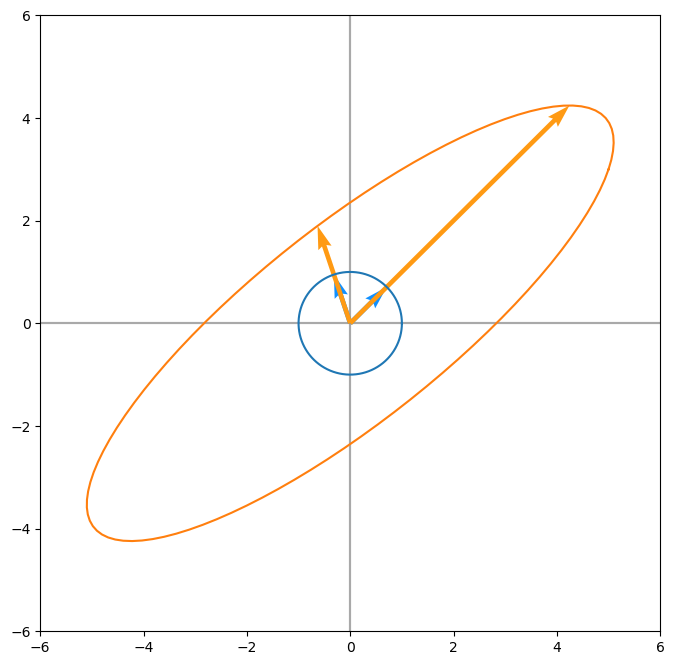

In [ ]:
A = np.array([[5, 1], [3, 3]])
linearTransformation(A)

Visualisation of rotation of vectors in unit circle by a symmetric matrix. The eigenvectors are the semi-axes of the ellipse.

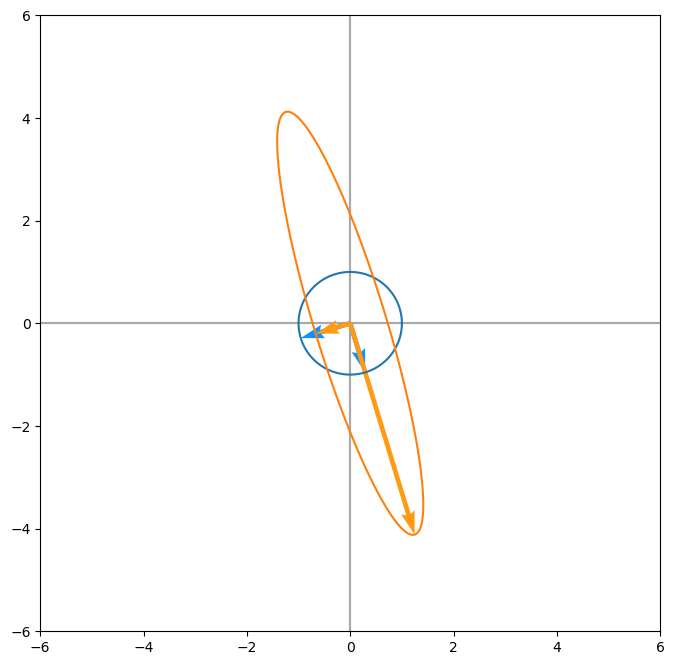

In [ ]:
A = np.array([[1,-1], [-1, 4]])
linearTransformation(A)

For diagonal matrices the eigenvectors are in the direction of the axes, therefore also the ellipse is not rotated.

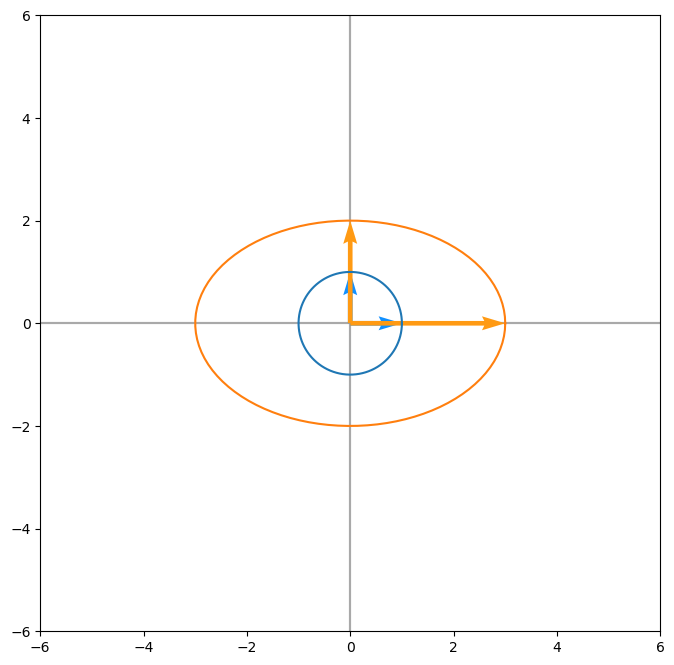

In [ ]:
A = np.array([[3,0], [0, 2]])
linearTransformation(A)

# Singular Value Decomposition
Matrix $A$ can be decomposed into three matrices $U D V^T$ using eigenvectors and eigenvalues. If we have a matrix $B = A^TA$, its eigenvalues are real nonnegative numbers.
The matrices $U$, $D$, and $V$ have the following properties:
* $U$ and $V$ are orthogonal matrices $U^T=U^{−1}$
* and $V^T$=$V^{−1}$
* $D$ is a diagonal matrix (all $0$ except the diagonal). However $D$ is not necessarily square.

The columns of $U$ are called the left-singular vectors of $A$ while the columns of $V$ are the right-singular vectors of $A$. The values along the diagonal of $D$ are the singular values of $A$.

In [ ]:
A = np.array([[1, 3, 5], [1, 1, 0], [1, 3, 3]])
print(A)

[[1 3 5]
 [1 1 0]
 [1 3 3]]


To perform the SVD we can call the function `np.linalg.svd`. Note, that `numpy` returns `D` as a vector not as a diagonal matrix.

In [ ]:
U, D, V = np.linalg.svd(A)
print(f"U:\n{U}")
print(f"D:\n{D}")
print(f"V:\n{V}")

U:
[[-0.80201112  0.40824829 -0.43601777]
 [-0.10720024 -0.81649658 -0.56731071]
 [-0.58761064 -0.40824829  0.69860365]]
D:
[7.33835425 1.41421356 0.38543071]
V:
[[-0.20397244 -0.58270089 -0.78667333]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.79060857  0.5719496  -0.21865897]]


Now, at first we obtain the matrix $B = U^T U$ and :

In [ ]:
B = A @ A.T
print(f'B:\n {B}')
C = A.T @ A
print(f'C:\n {C}')

B:
 [[35  4 25]
 [ 4  2  4]
 [25  4 19]]
C:
 [[ 3  7  8]
 [ 7 19 24]
 [ 8 24 34]]


To perform SVD, we need to do the following:

*   Obtain eigenvectors of $B$ and put it as columns of $U$
*   Obtain eigenvectors of $C$ and put it as columns of $V$ - this is your task
*   Obtain eigenvalues of $B$

In [ ]:
D_e, U_e = np.linalg.eig(B)
print(f'U matrix: \n {U}')
print(f'Sig matrix: \n {D_e}')

V_sing, V_e = np.linalg.eig(C)
print(f'V matrix: \n {V}')
print(f'U: {U_e.shape}, D: {D_e.shape}, V: {V_e.shape}')

U matrix: 
 [[-0.80201112  0.40824829 -0.43601777]
 [-0.10720024 -0.81649658 -0.56731071]
 [-0.58761064 -0.40824829  0.69860365]]
Sig matrix: 
 [53.85144316  0.14855684  2.        ]
V matrix: 
 [[-0.20397244 -0.58270089 -0.78667333]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.79060857  0.5719496  -0.21865897]]
U: (3, 3), D: (3,), V: (3, 3)


To get the matrix $D$ as in `np.linalg.svd`, we sort the eigen values and take a square root. The same reordering is applied for matrix $U$ and $V$. This way we have the columns ordered by some amount of information they contain.

Your **task** here is to reorder columns of $U$ and $V$ according to the order of singular values.

In [ ]:
sing_val_order = np.argsort(D_e)[::-1]
D_e = np.diag(np.sqrt(np.round(D_e[sing_val_order], 12)))
# order U_e  and V_e columns by the order of singular values
U_e= U_e[:, sing_val_order]
V_e = V_e[:, sing_val_order]

print(f"U found by SVD by eigendecomposition:\n{U_e}")
print(f"U found by numpy.linalg.svd:\n{U}")
print(f"\nD found by SVD by eigendecomposition:\n{D_e}")
print(f"D found by numpy.linalg.svd:\n{D}")
print(f"\nV found by SVD by eigendecomposition:\n{V_e.T}")
print(f"V found by numpy.linalg.svd:\n{V}")

U found by SVD by eigendecomposition:
[[-0.80201112  0.40824829 -0.43601777]
 [-0.10720024 -0.81649658 -0.56731071]
 [-0.58761064 -0.40824829  0.69860365]]
U found by numpy.linalg.svd:
[[-0.80201112  0.40824829 -0.43601777]
 [-0.10720024 -0.81649658 -0.56731071]
 [-0.58761064 -0.40824829  0.69860365]]

D found by SVD by eigendecomposition:
[[7.33835425 0.         0.        ]
 [0.         1.41421356 0.        ]
 [0.         0.         0.38543071]]
D found by numpy.linalg.svd:
[7.33835425 1.41421356 0.38543071]

V found by SVD by eigendecomposition:
[[-0.20397244 -0.58270089 -0.78667333]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.79060857  0.5719496  -0.21865897]]
V found by numpy.linalg.svd:
[[-0.20397244 -0.58270089 -0.78667333]
 [-0.57735027 -0.57735027  0.57735027]
 [-0.79060857  0.5719496  -0.21865897]]


Comparison of the decomposition.

In [ ]:
print(f"Matrix obtained by SVD eigen decomposition:\n{np.round(U_e @ D_e @ V_e.T , 4)}")
print(f"Matrix obtained by linalg SVD:\n{np.round(U @ np.diag(D) @ V, 4)}")

Matrix obtained by SVD eigen decomposition:
[[1. 3. 5.]
 [1. 1. 0.]
 [1. 3. 3.]]
Matrix obtained by linalg SVD:
[[ 1.  3.  5.]
 [ 1.  1. -0.]
 [ 1.  3.  3.]]


To approximately decompose the matrix, we can use just a subset of columns of the three matrices.

In [ ]:
def svd_subset(U, D, V, ncomp = 2):
  if D.ndim == 1:
    D = np.diag(D)
  return U[:,:ncomp] @ D[:ncomp, :ncomp] @ V[:ncomp, ]

If we do a decomposition of the matrices using only first two eigenvectors, first two singular values, we already get a quite good approximation of the original matrix .

In [ ]:
print(svd_subset(U_e, D_e, V_e.T, 2))
print(svd_subset(U, D, V, 2))

[[ 0.86713456  3.09611878  4.96325335]
 [ 0.82712634  1.12506191 -0.04781175]
 [ 1.21288188  2.84599496  3.05887684]]
[[ 0.86713456  3.09611878  4.96325335]
 [ 0.82712634  1.12506191 -0.04781175]
 [ 1.21288188  2.84599496  3.05887684]]


## Application of singular value decomposition on images

In [ ]:
#@title Importing libraries { display-mode: "form" }
import requests
from io import BytesIO

import numpy as np
from PIL import Image # pip install Pillow

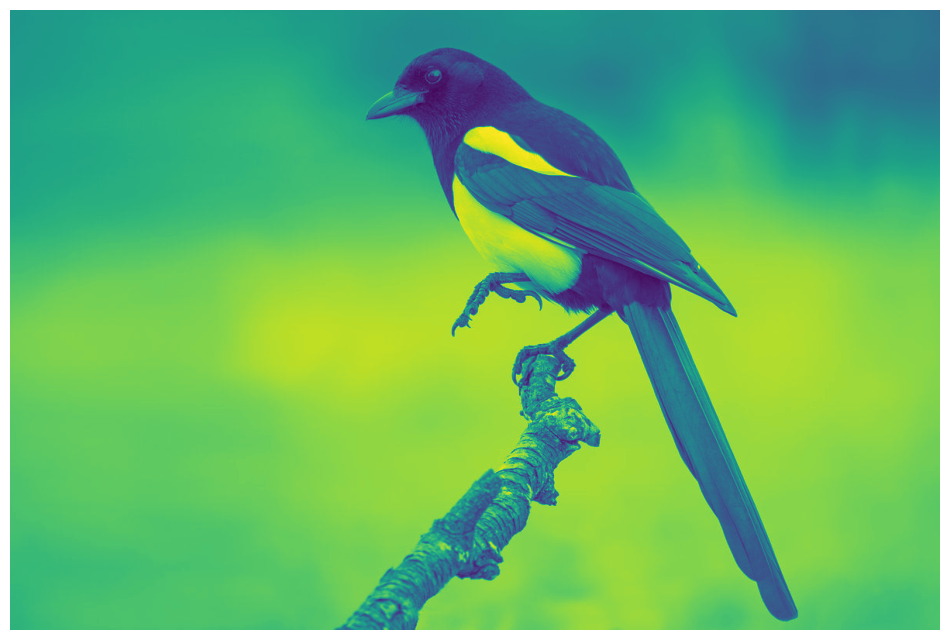

In [ ]:
#@title Loading and downloading the image { display-mode: "form" }
img_url = "https://m.smedata.sk/api-media/media/image/sme/8/37/3782108/3782108_1200x.jpeg?rev=3"
def display(im, save = None):
    plt.figure(figsize=[12,12], frameon = False)
    plt.imshow(im)
    plt.axis("off")
    if save is not None:
      plt.savefig(f"{save}.png")
    plt.show()


res = requests.get(img_url)
bio = BytesIO(res.content)

img = Image.open(bio)

# img = img.resize((512, 512))

img_gs = img.convert("L")
img_array_gs = (np.array(img_gs) / 255.0).astype(np.float32)
display(img_array_gs)

Using `np.linalg.svd` we perform the singular value decomposition of the `img_array_gs` matrix.

In [ ]:
U, D, V = np.linalg.svd(img_array_gs, full_matrices=False)

We can print the dimensions of the decomposed matrices.

In [ ]:
print(f"Shape of U: {U.shape}, shape of D: {D.shape}, shape of V:{V.shape}")

Shape of U: (800, 800), shape of D: (800,), shape of V:(800, 1200)


Now to reconstruct an image, we can just use a subset of the dimensions of the $U, D, V$ matrices. To get the image in a simple way, try to multiply $U_{1:k} D_{1:k, 1:k}, (V_{1:k})^T$, in other words using a subset of the first $k$ columns of matrix $U$, first $k$ columns and rows of matrix $D$ and first $k$ rows of matrix $V$, with $k=6$.

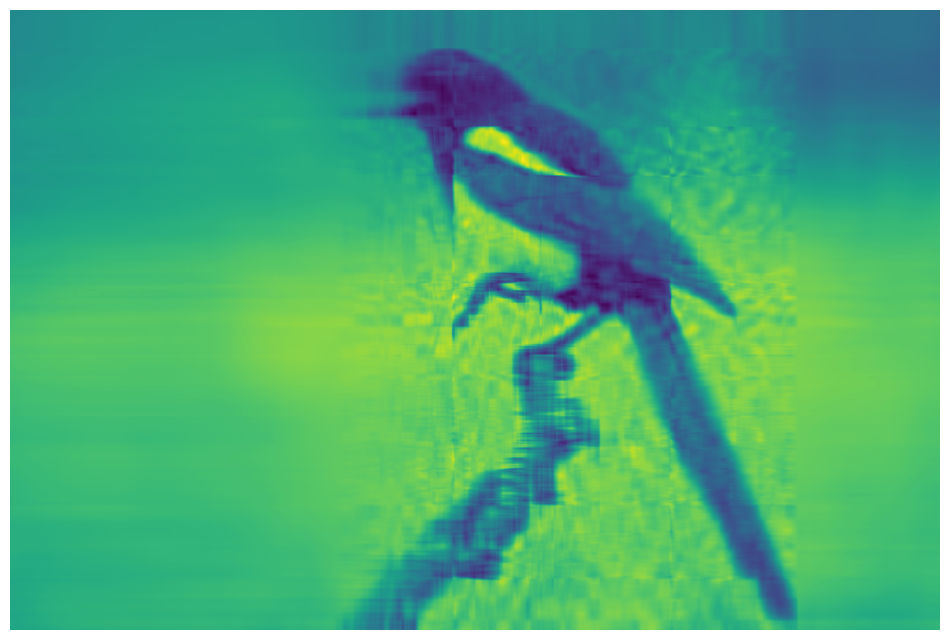

In [ ]:
k = 20
reconst_img = U[:, :k] @ np.diag(D[:k]) @ V[:k, :]
display(reconst_img)

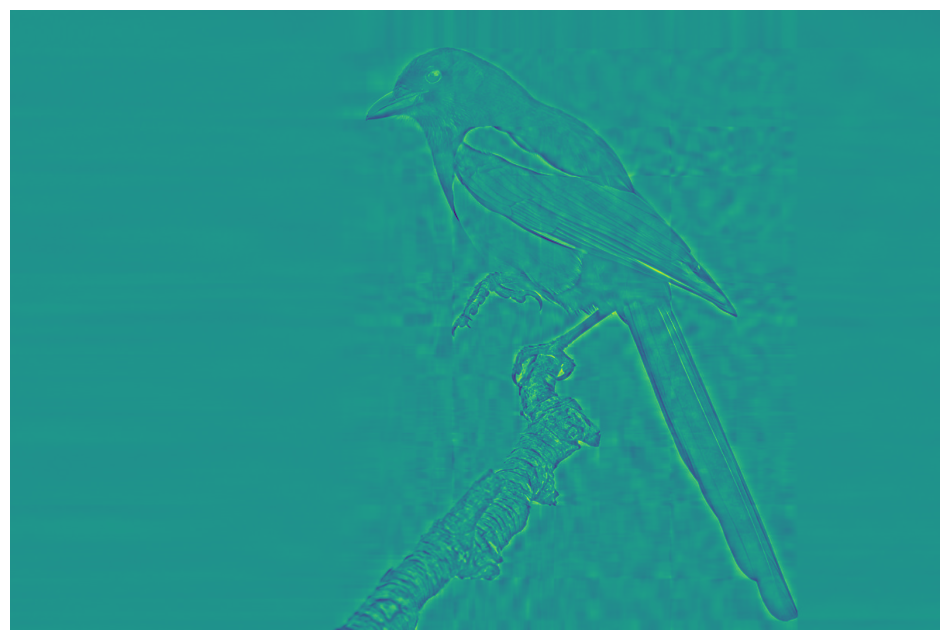

In [ ]:
# recreate the image using last k values of decomposition, those of least significance
k = 800-20
reconst_img = U[:, -k:] @ np.diag(D[-k:]) @ V[-k:, :]
display(reconst_img)

Try to plot more detailed image with larger values of $k$.

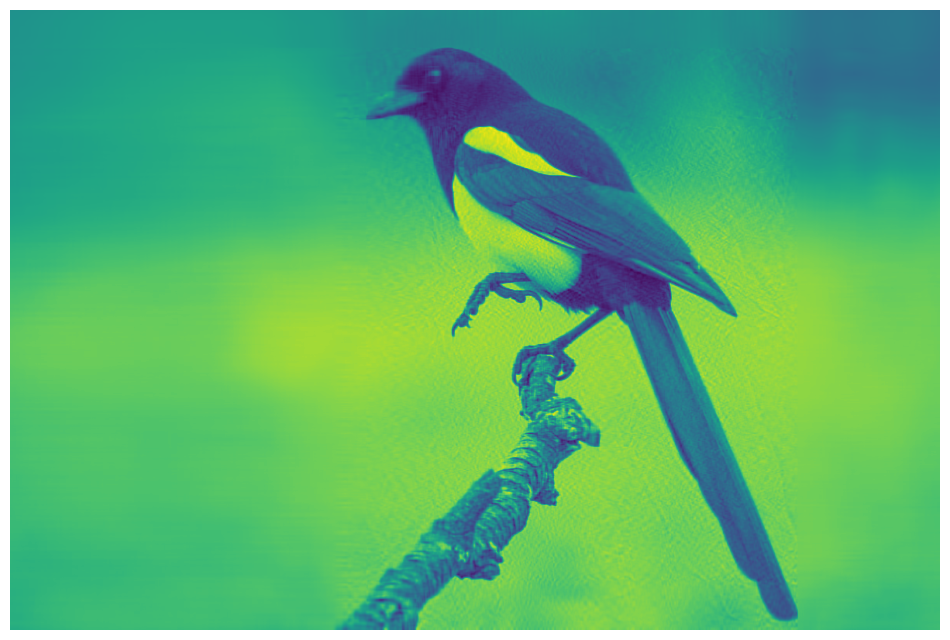

In [ ]:
k = 80
reconst_img =  U[:, :k] @ np.diag(D[:k]) @ V[:k, :]
display(reconst_img)

# Least squares

## Housing stock data
Now, we will be doing linear regression [Real estate](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download) data from kaggle.

Here, we will try to find the coefficients of the linear relationship between the the housing prices (response vector $y$) and the rest of columns, which we will call predictors. The relationship can be denoted as $\hat{y} = Xa$, where $\hat{y}$ is the estimate of the response, $X$ is the predictor matrix and $a$ are the regression coefficients.

To start, run the code cell below to download the data.

In [ ]:
# data for regression
url = 'https://drive.google.com/file/d/1lZMjd7v2sbtI91i_In5cm4-5LhX4e1IW/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
real_estate_df = pd.read_csv(path, header=0,index_col=0)

real_estate_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In the slides, you have equation to estimate values of regression coefficients.

**Task**

Try to estimate these coefficients using the provided data. Extract from the data the  input matrix $X$ as well as response $y$. Do not forget to add vector of ones to the data to include intercept in your regression.

**Hint**:
The pandas `iloc` function with `[]` serves to extract columns by indices and the `to_numpy` function serves to extract the numpy matrix.
To append a column to $X$ matrix, first create an $n \times 1$ column vector of ones. Next, you can use the `np.hstack` function to add the vector to the matrix, and pass the columns and ones vector as a tuple to the function.

In [ ]:
X = real_estate_df.iloc[:, :-1].to_numpy()
ones_column = np.ones((X.shape[0], 1))
X = np.hstack((ones_column, X))
y = real_estate_df.iloc[:, -1].to_numpy()

print(f"X has {X.shape[0]} rows and {X.shape[1]} columns")

X has 414 rows and 7 columns


Now, print the regression coefficient rounded to 4 numbers and display a histogram of residuals. To obtain the residuals, you need to do an estimation of $y$, using your coefficients.

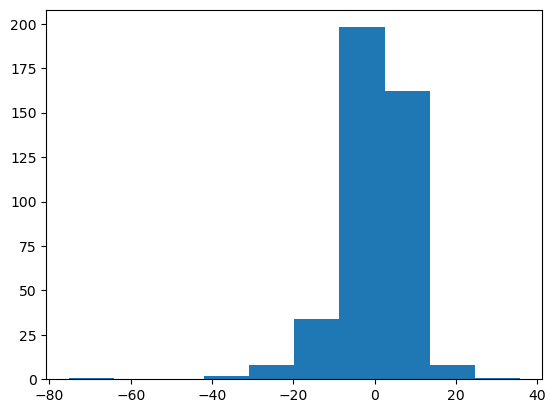

In [ ]:
# print the regression coefficients here
a = np.linalg.inv((X.T @ X)) @ X.T @ y
y1 = X @a
residuals = y1 - y
plt.hist(residuals)
plt.show()

# Back to Gram-Schmidt
Another way to solve the example above, is to use the Gram-Schmidt algorithm and QR factorisation.

In [ ]:
def gram_schmidt_orto(A):
    n, m = A.shape # get the shape of A
    Q = np.empty((n, m), dtype = float) # initialize matrix Q
    for i in range(m):
      q = A[:, i]
      for j in range(i):
        q = q - (Q[:, j].T @ A[:,i]) * Q[:, j]
      if np.linalg.norm(q) == 0:
        raise Exception("Linearly dependent vector")
      Q[:, i] = q / np.linalg.norm(q)
    return Q

In the next step we will decompose the matrix $A$, into matrices $Q$ and $R$, where $A = QR$. Briefly, the $R_{ij}$ element of matrix is obtained by multiplying $q_i^T a_j$ for $i < j$ and also $R_{ij} = \lVert\tilde{q_i}\rVert$. If you notice, the condition we only define $i < j$, that means $R$ is an upper triangular matrix. From the slides you know, that $Q$ is obtained by the Gram-Schmidt algorithm and the equation for obtaining $R$ is also in the slides 😉.

Below, Add code to obtain $R$ with passing Gram-schmidt function as value of `GS_alg`.

In [ ]:
def QR_factorization(A, Q=None, GS_alg = None):
    n, m = A.shape
    if Q is None:
      Q = GS_alg(A)
    R = Q.T @ A
    return Q, R


Compare the matrices obtained from your with the numpy's QR factorisation. The matrix $R$ must be upper triangular!

In [ ]:
A = np.array([[3, 2 ,4, 2],[0, 3, 5, 6],[3, 5, 9, 10],[1, 3, 4, 3]])


Q,R = QR_factorization(A, GS_alg = gram_schmidt_orto)
print(Q)
print(np.round(Q,5))
print(np.round(R,5))

Q_np, R_np = np.linalg.qr(A)
print("\nNumpy solution:")
print(np.round(Q_np,5))
print(np.round(R_np,5))

[[ 6.88247202e-01 -4.38099226e-01 -3.24272218e-02 -5.77350269e-01]
 [ 0.00000000e+00  7.34460466e-01  3.56699439e-01 -5.77350269e-01]
 [ 6.88247202e-01  2.96361241e-01  3.24272218e-01  5.77350269e-01]
 [ 2.29415734e-01  4.25213954e-01 -8.75534987e-01 -1.84604418e-14]]
[[ 0.68825 -0.4381  -0.03243 -0.57735]
 [ 0.       0.73446  0.3567  -0.57735]
 [ 0.68825  0.29636  0.32427  0.57735]
 [ 0.22942  0.42521 -0.87553 -0.     ]]
[[ 4.3589   5.50598  9.86488  8.94721]
 [ 0.       4.08463  6.28801  7.76982]
 [ 0.      -0.       1.0701   2.69146]
 [-0.       0.       0.       1.1547 ]]

Numpy solution:
[[-0.68825  0.4381   0.03243 -0.57735]
 [-0.      -0.73446 -0.3567  -0.57735]
 [-0.68825 -0.29636 -0.32427  0.57735]
 [-0.22942 -0.42521  0.87553 -0.     ]]
[[-4.3589  -5.50598 -9.86488 -8.94721]
 [ 0.      -4.08463 -6.28801 -7.76982]
 [ 0.       0.      -1.0701  -2.69146]
 [ 0.       0.       0.       1.1547 ]]


To obtain the matrix above, you need to finish the function for backsubstitution below.

Two cells below, you can find a simple example to verify your code.

In [ ]:
def backsubstitution(A, b):
    x = np.zeros(A.shape[0], dtype=np.float64)  # Ensure consistent data type
    n = A.shape[0]

    for i in range(n-1, -1, -1):
        x[i] = (b[i] - A[i, i+1:] @ x[i+1:]) / A[i, i]

    return x

Verify your backsubstitution on the following set of equations:

$3x_1 + 2x_2 + 4x_3 + 2x_4 = 49$

$3x_2 + 5x_3 + 6x_4 = 40$

$2x_3 + 4x_4 = 16$

$3x_4 = 9$

In [ ]:
A = np.array([[3, 2 ,4, 2],[0, 3, 5, 6],[0, 0, 2, 4],[0, 0, 0, 3]], dtype = np.float32)
b = np.array([49, 40, 16, 9], dtype = np.float32)
print(A)
print(backsubstitution(A, b))

[[3. 2. 4. 2.]
 [0. 3. 5. 6.]
 [0. 0. 2. 4.]
 [0. 0. 0. 3.]]
[9. 4. 2. 3.]


#### Combining backsubstitution and QR factorization to solve the regression problem

First, take a look at Algorithm 11.2 at p. 208 of the VMLS book. It shows you how to combine backsubstitution with QR factorisation to solve set of equations $Ax = b$.

Combine Gram-Schmidt ortogonalization, QR factorisation and backsubstitution together, to obtain the solution of least squares for the housing prices dataset. Is it the same as you obtained before?

#### Making predictions of house prices
As we have obtained the coefficients, we are ready to do some predictions! Use the data defined below and the coefficients you obtained to get some predictions of the house prices. After obtaining the predictions, measure the prediction error, for example using RMS from the slides, or just take mean value of the absolute error of residuals.

In [ ]:
predictions_url = 'https://drive.google.com/file/d/1dwH8owC3JDSH8jPcAOMotPuvY2fKsB2T/view?usp=sharing'
predictions_path = 'https://drive.google.com/uc?export=download&id='+predictions_url.split('/')[-2]
predictions_df = pd.read_csv(predictions_path, header=0, index_col=0)
X2 = predictions_df.iloc[:,:-1].to_numpy()
y2 = predictions_df.iloc[:,-1].to_numpy()